In [1]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
f_app = os.path.join('data/application_train.csv')
print('Path of read in data: %s' % (f_app))
app_train = pd.read_csv(f_app)
app_train.head()

Path of read in data: data/application_train.csv


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


### 依照特徵型態分類資料

In [3]:
dtype_df = app_train.dtypes.reset_index() 
dtype_df.columns = ["Count", "Column Type"]
dtype_df = dtype_df.groupby("Column Type").aggregate('count').reset_index()
dtype_df

,Column Type,Count
0,int64,41
1,float64,65
2,object,16


In [4]:
int_features = []
float_features = []
object_features = []

for dtype, feature in zip(app_train.dtypes, app_train.columns):
    if dtype == 'float64':
        float_features.append(feature)
    elif dtype == 'int64':
        int_features.append(feature)
    else:
        object_features.append(feature)

### 先處理數值型資料

In [5]:
# 將 int_features, float_features合併
numeric_columns = int_features + float_features

# 因為會包含類別型資料，所以再把只有 2 值 (通常是 0,1) 的欄位去掉
numeric_columns = list(app_train[numeric_columns].columns[list(app_train[numeric_columns].apply(lambda x:len(x.unique())!=2 ))])

In [6]:
print("Numbers of remain columns:" + str(len(numeric_columns)))

Numbers of remain columns:73


### 使用盒狀圖檢視數值範圍

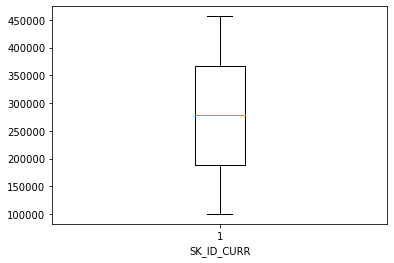

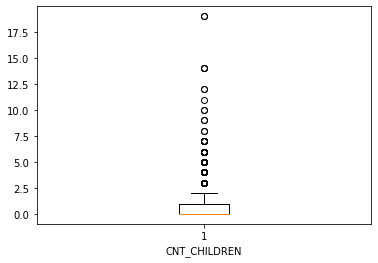

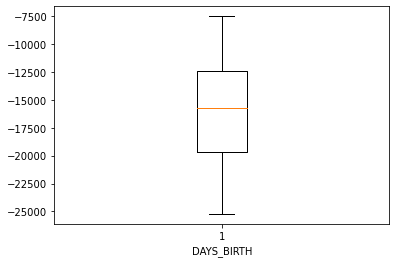

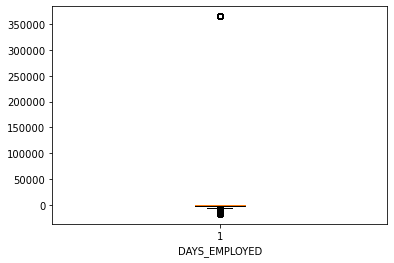

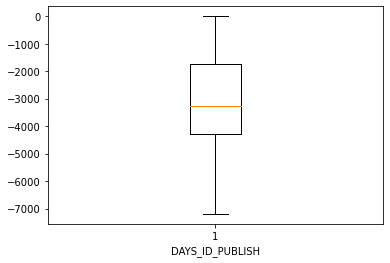

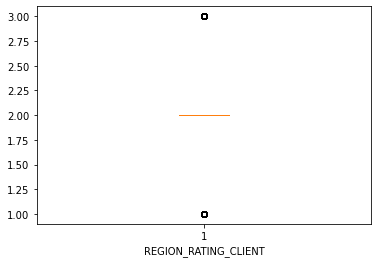

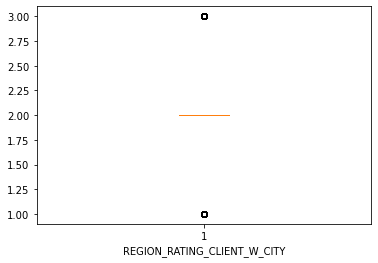

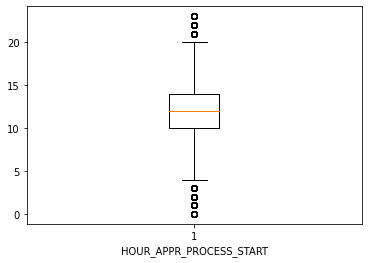

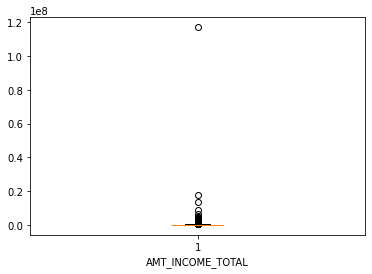

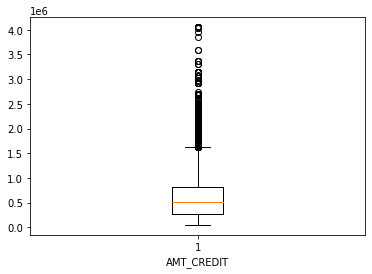

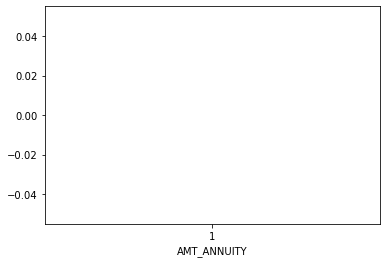

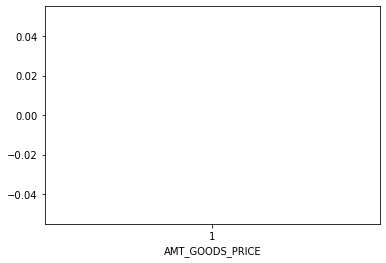

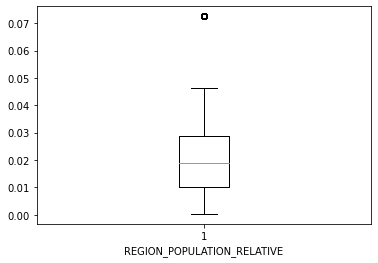

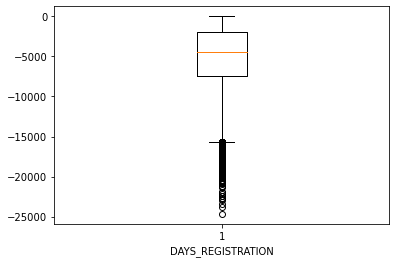

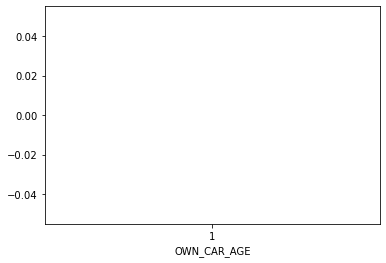

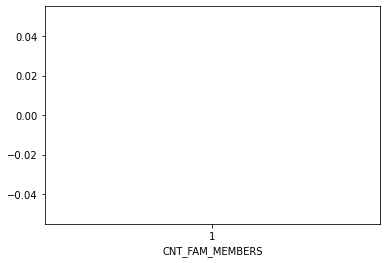

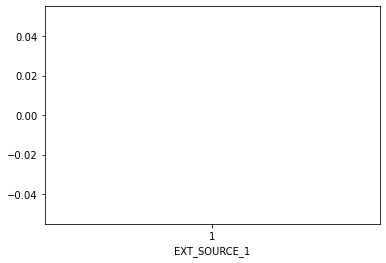

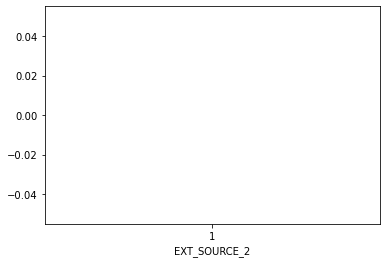

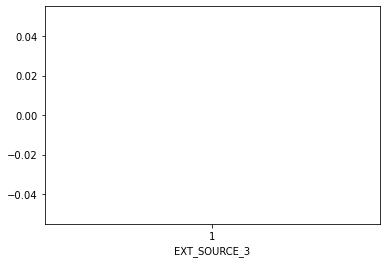

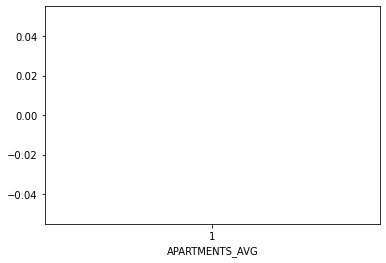

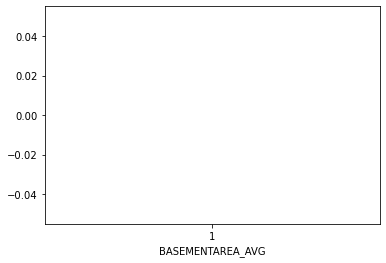

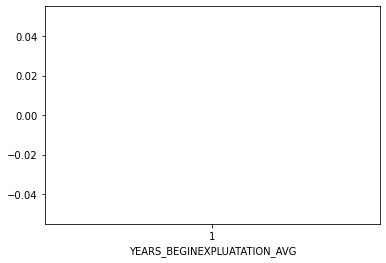

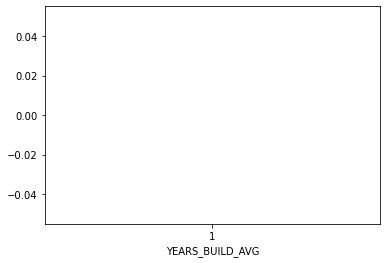

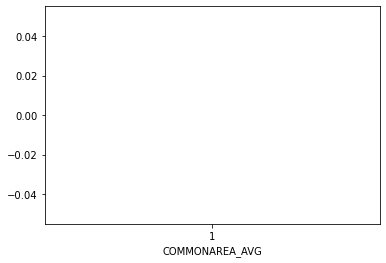

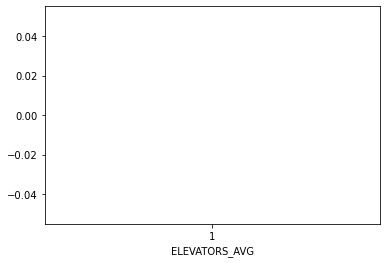

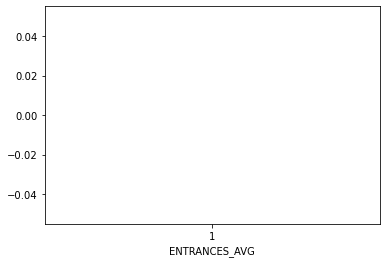

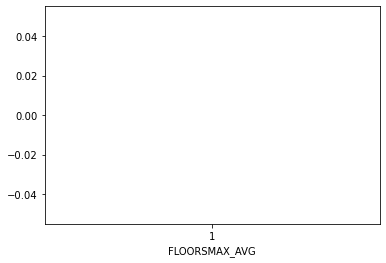

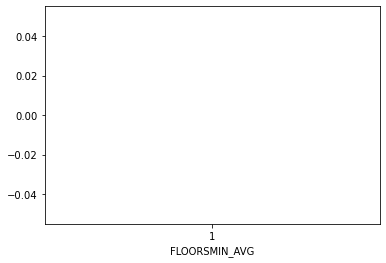

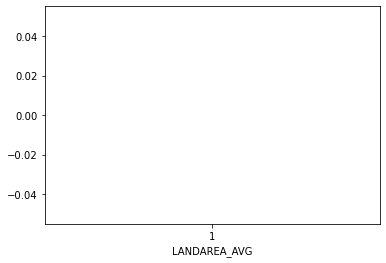

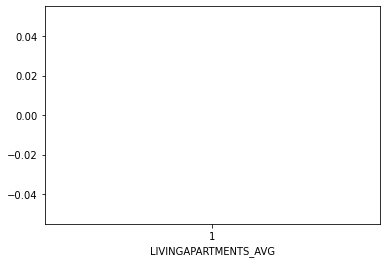

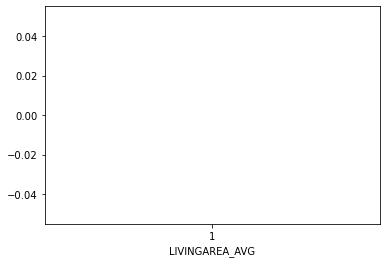

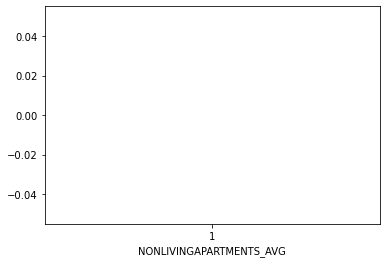

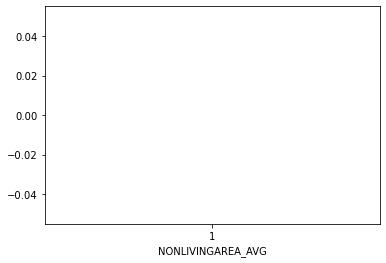

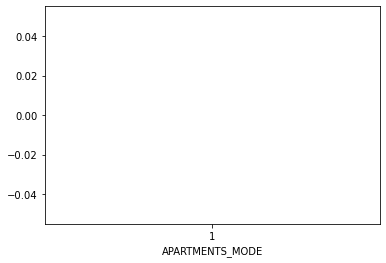

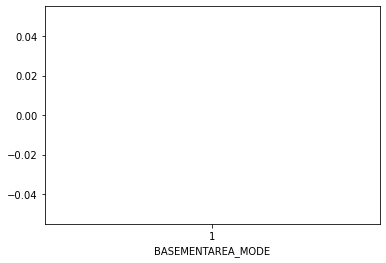

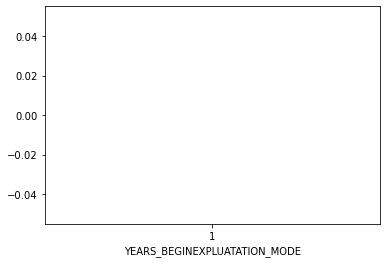

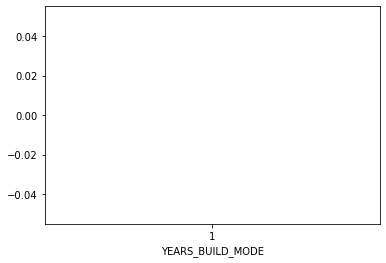

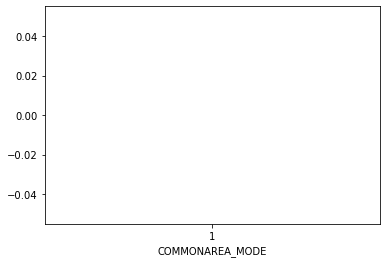

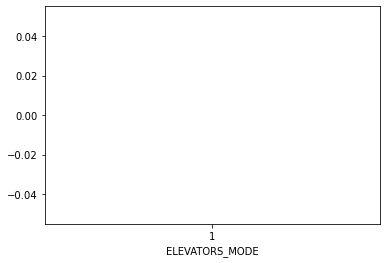

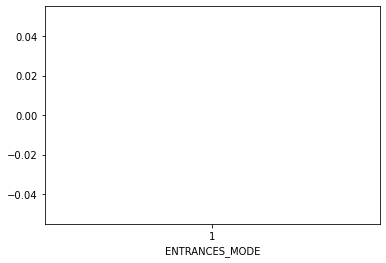

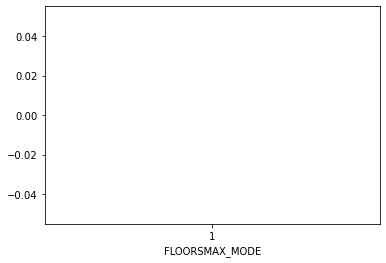

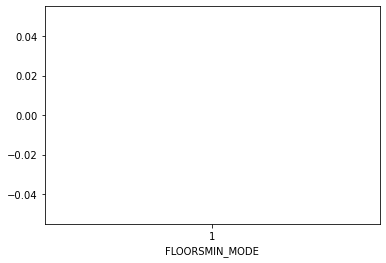

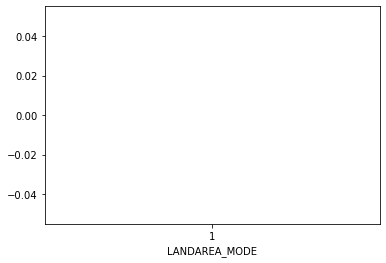

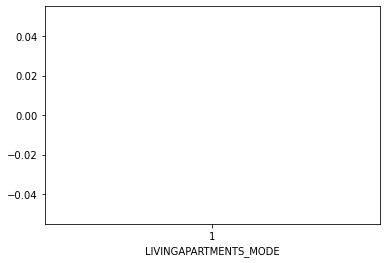

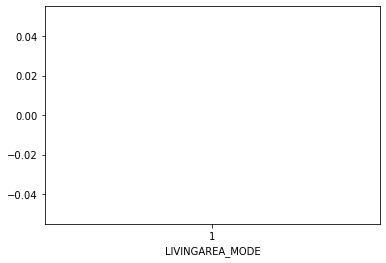

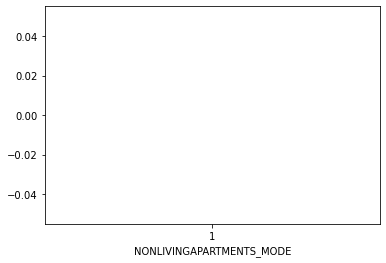

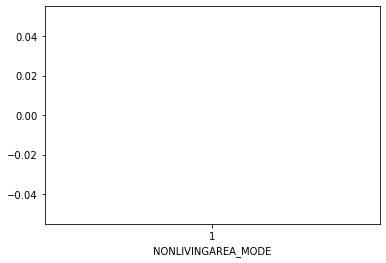

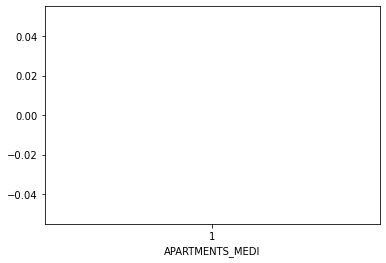

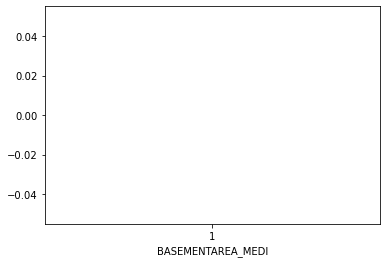

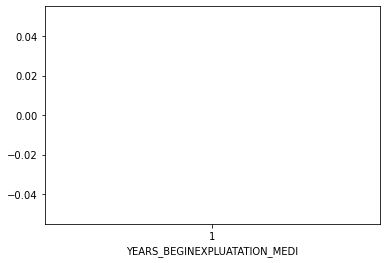

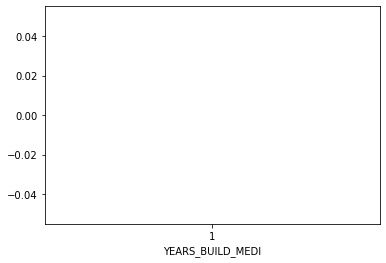

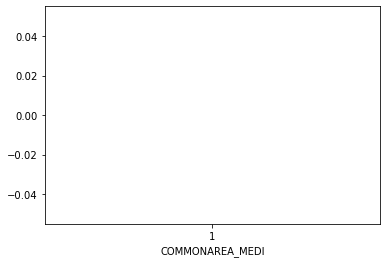

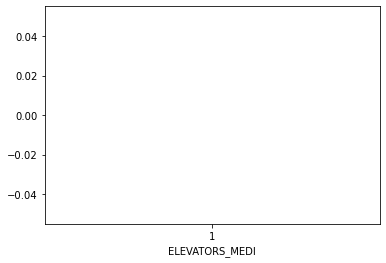

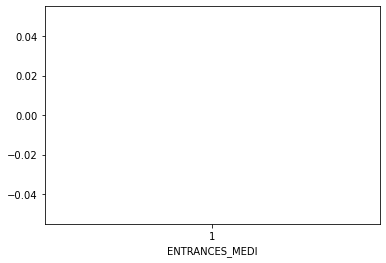

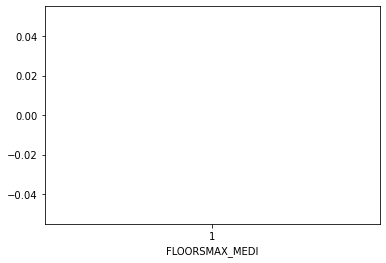

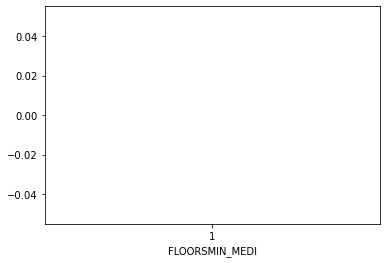

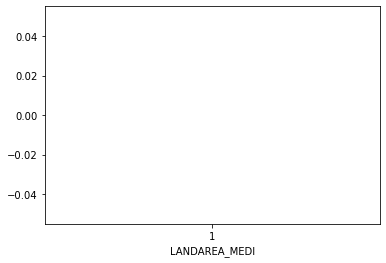

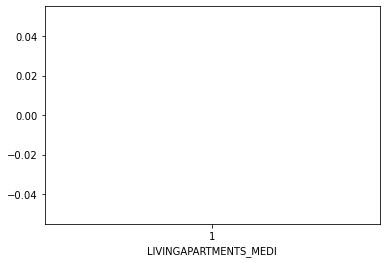

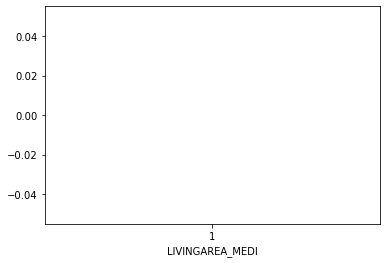

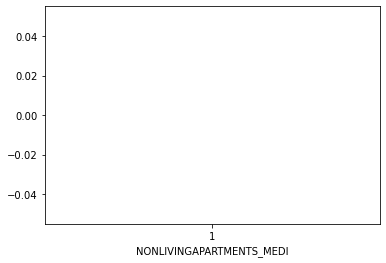

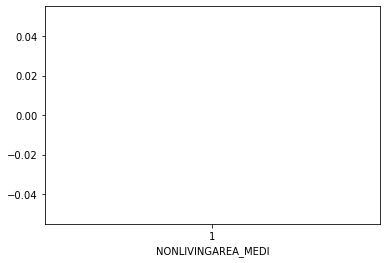

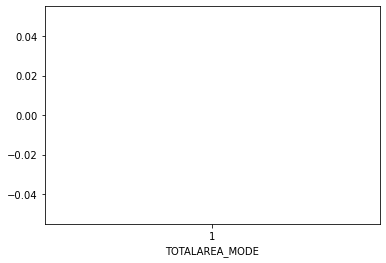

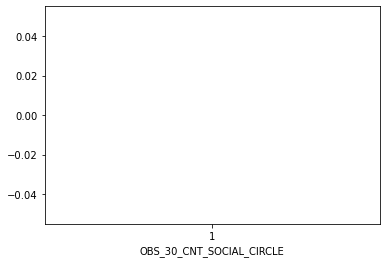

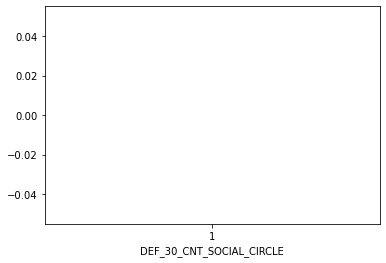

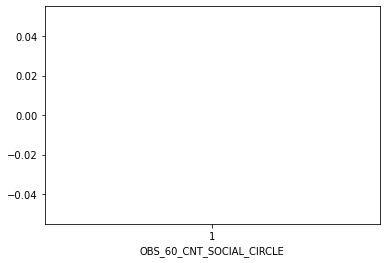

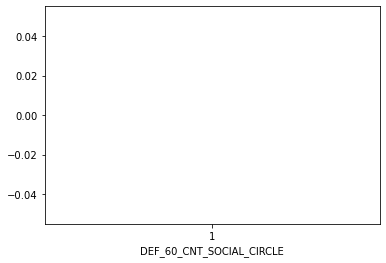

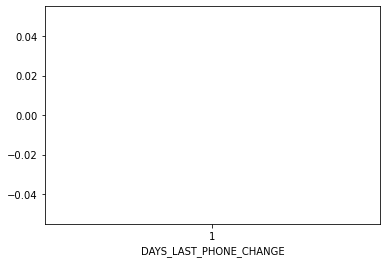

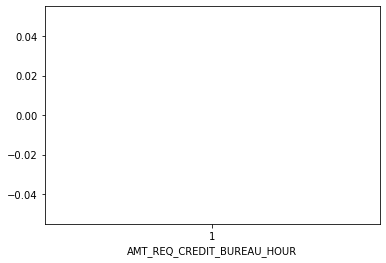

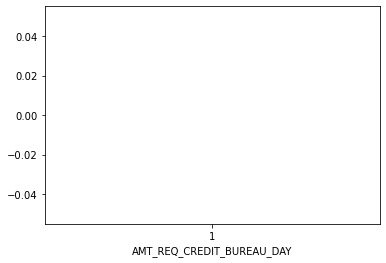

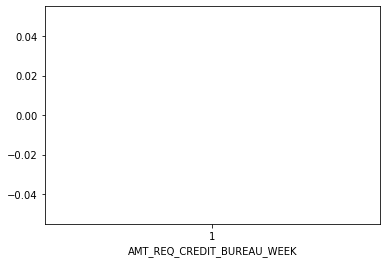

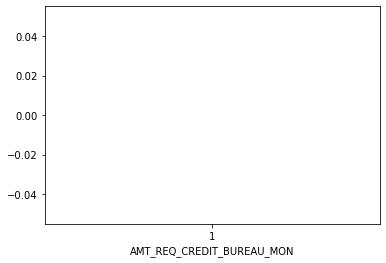

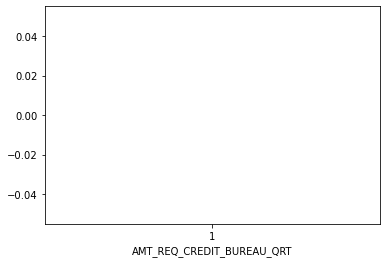

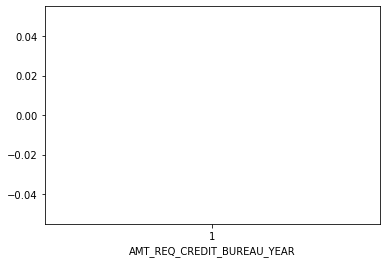

In [7]:
# 盒狀圖
for col in numeric_columns:
    """
    Your CODE HERE, make the box plot
    """
    plt.boxplot(app_train[col])
    plt.xlabel(col)
    plt.show()

### 因為有些欄位盒狀圖無法顯示，所以用直方圖

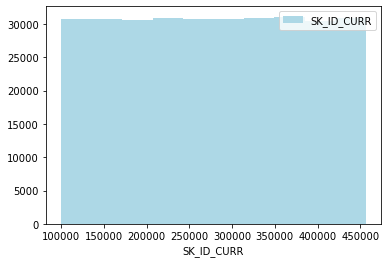

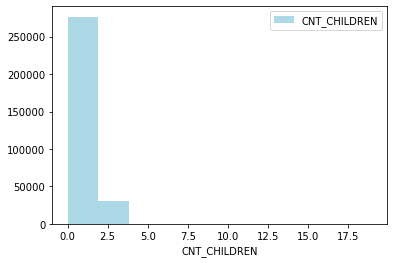

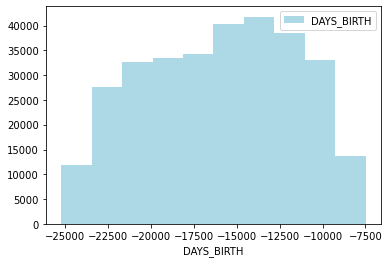

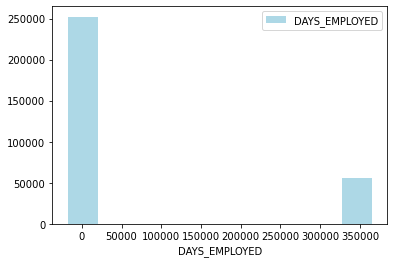

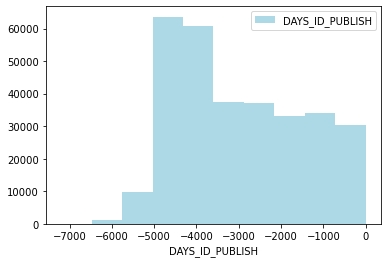

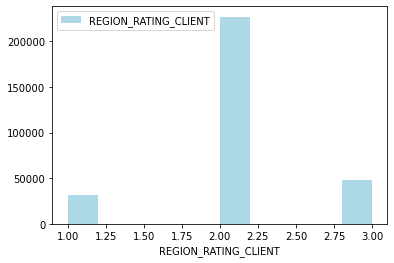

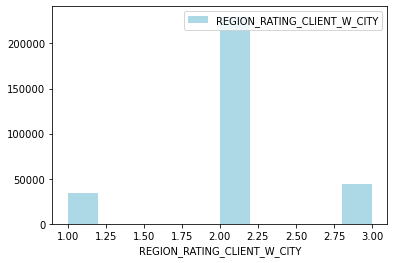

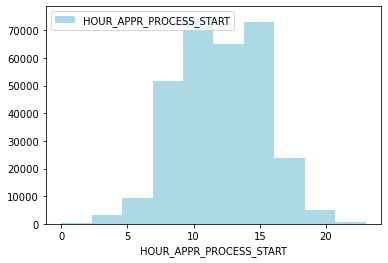

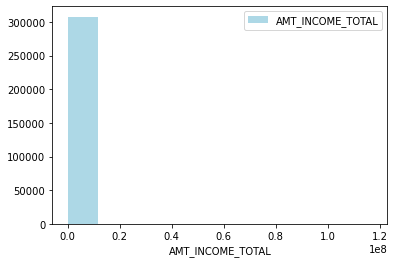

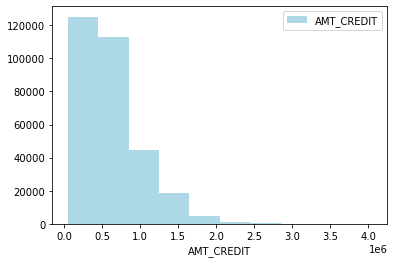

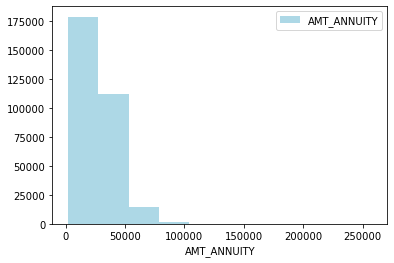

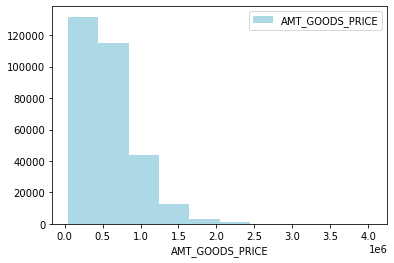

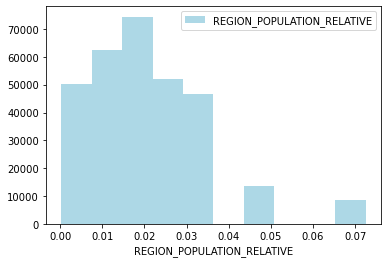

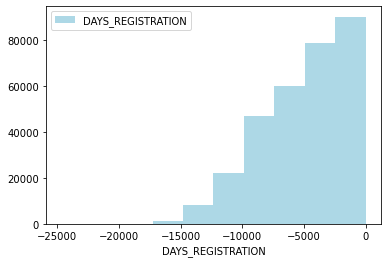

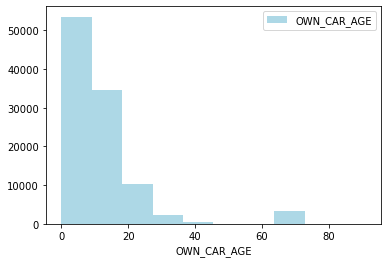

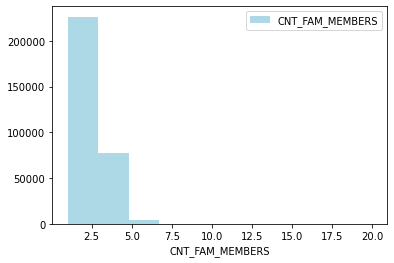

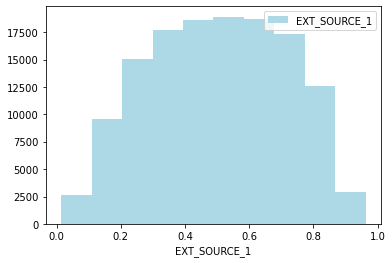

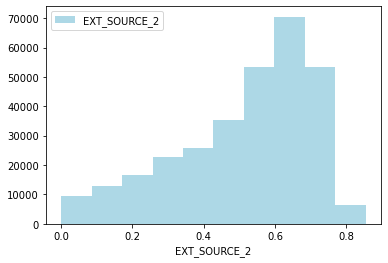

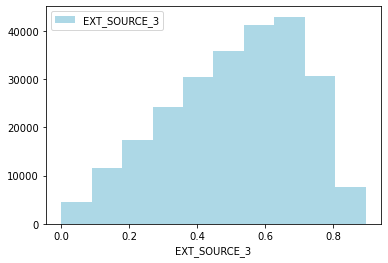

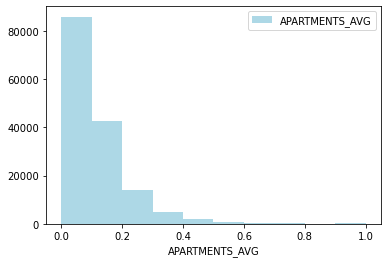

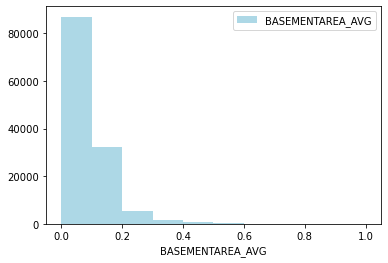

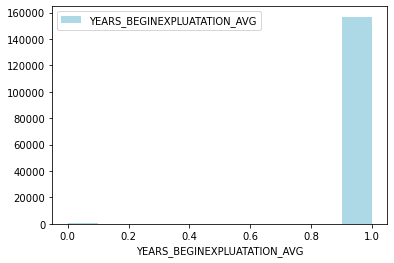

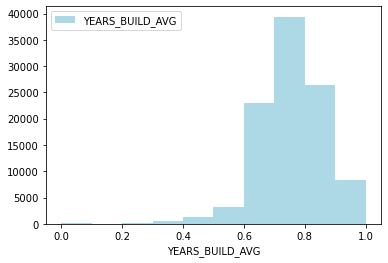

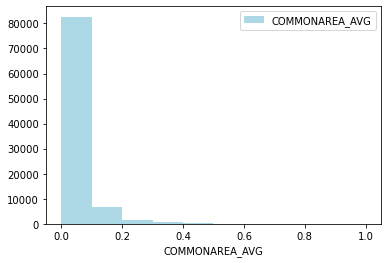

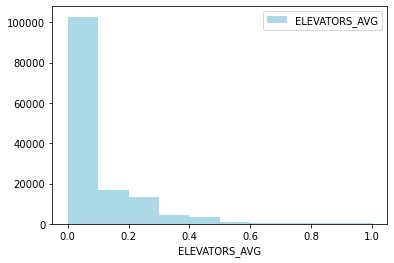

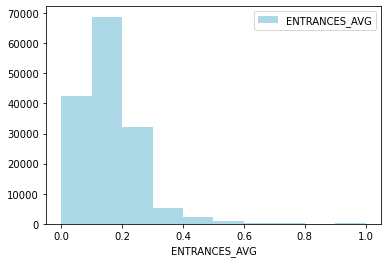

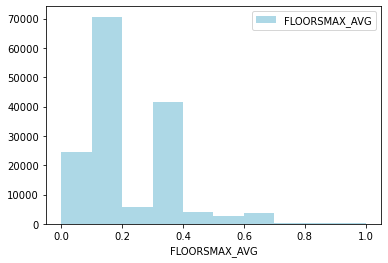

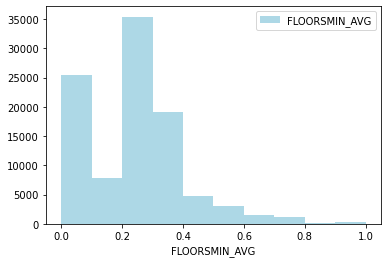

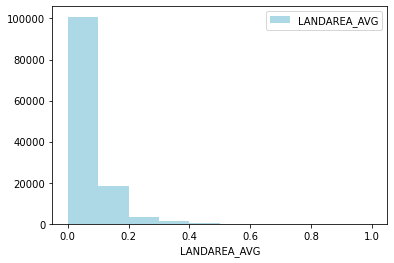

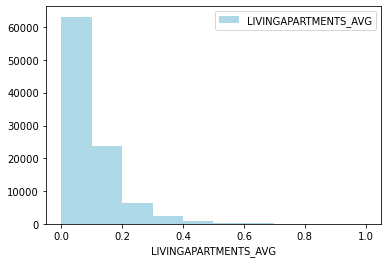

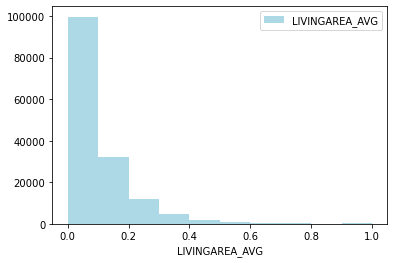

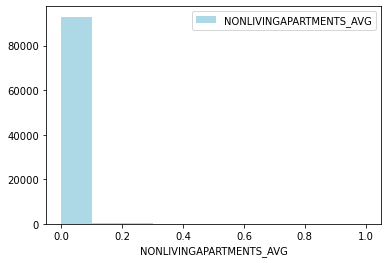

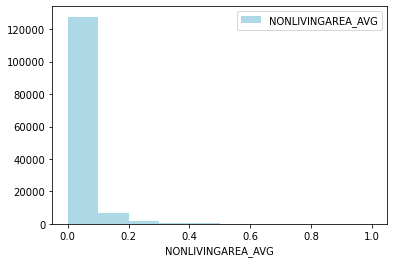

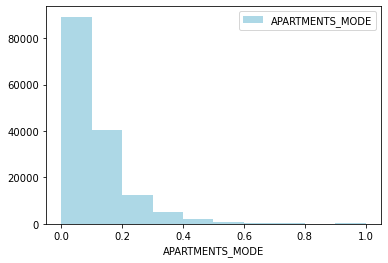

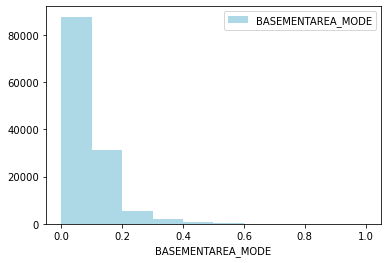

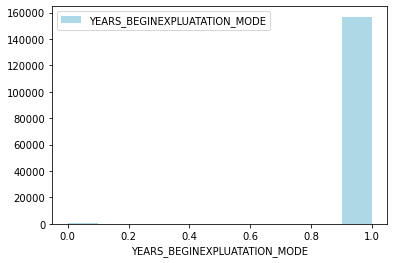

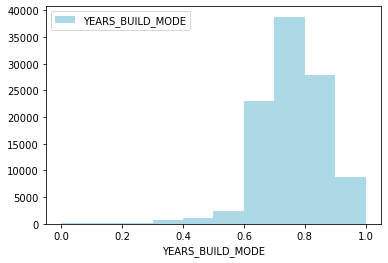

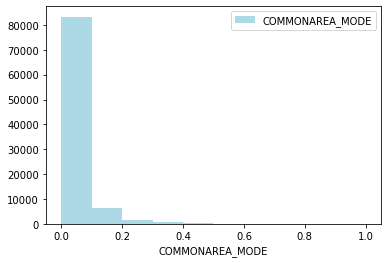

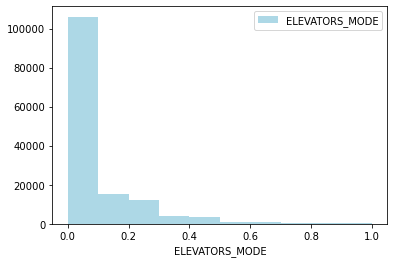

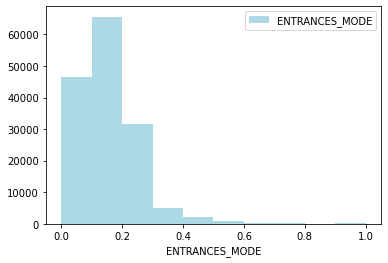

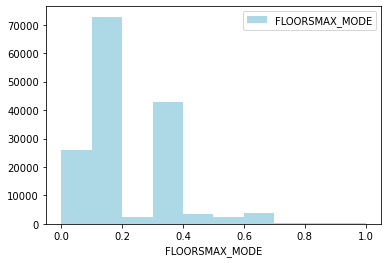

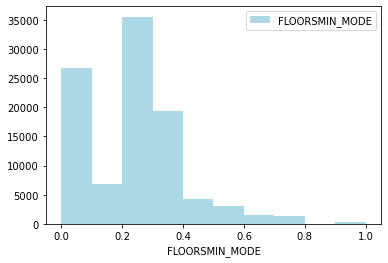

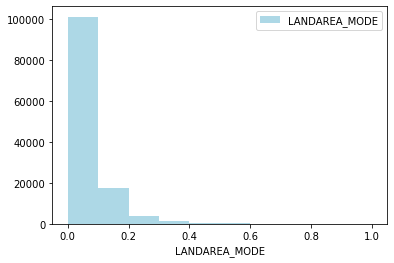

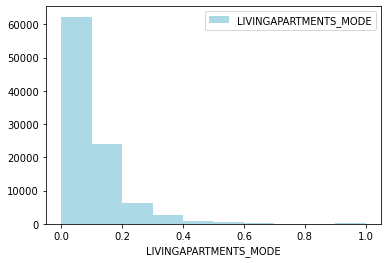

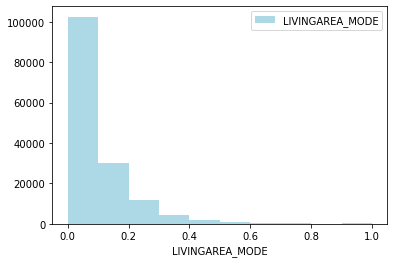

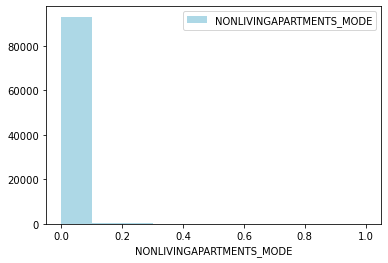

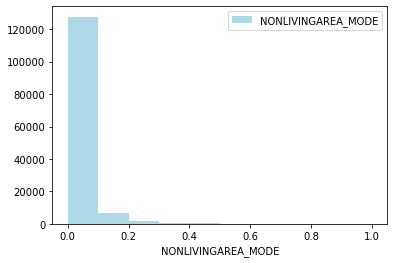

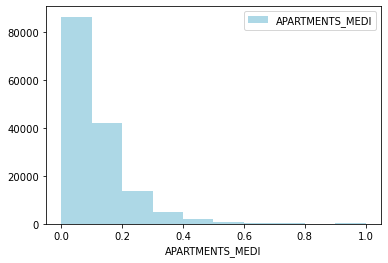

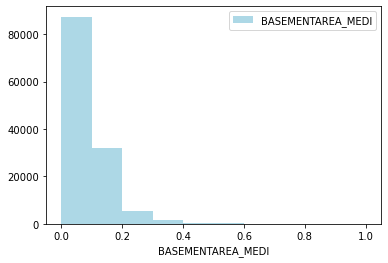

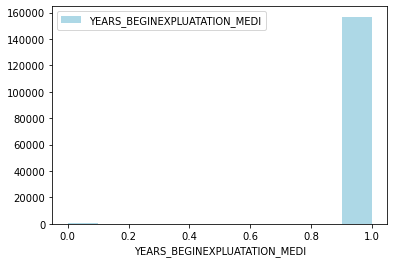

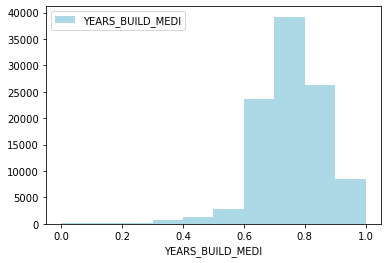

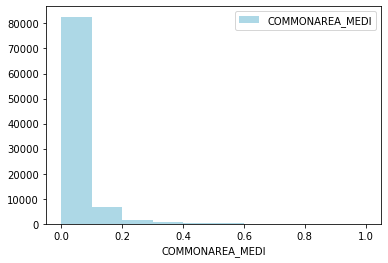

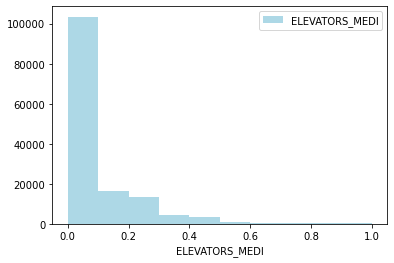

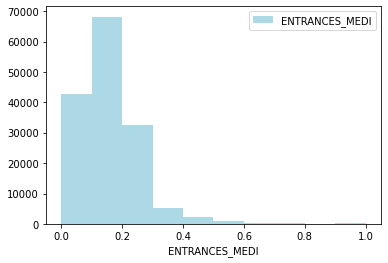

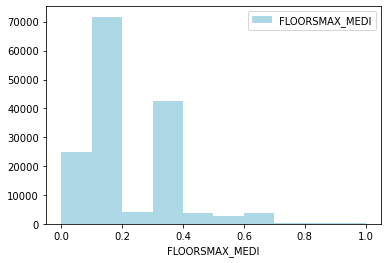

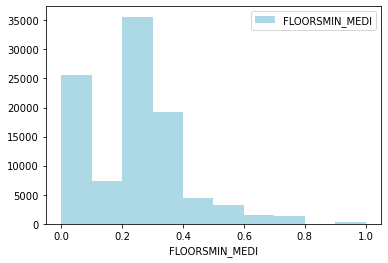

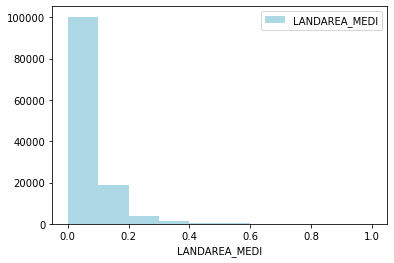

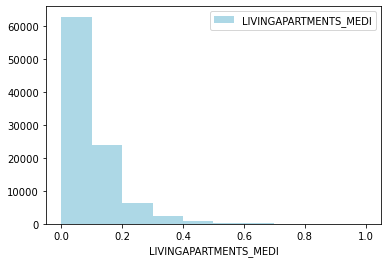

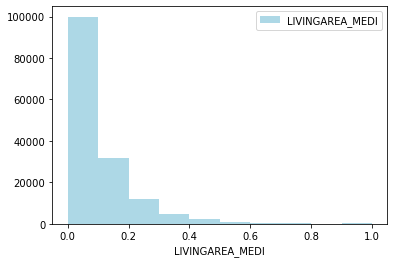

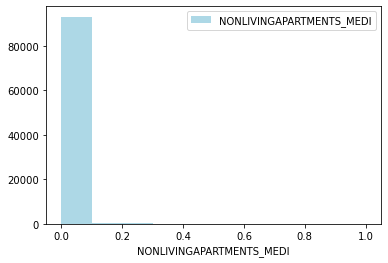

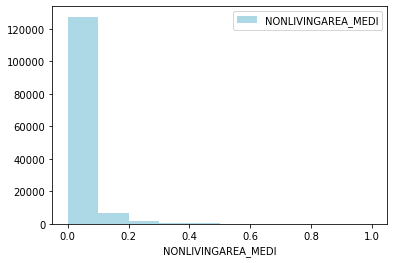

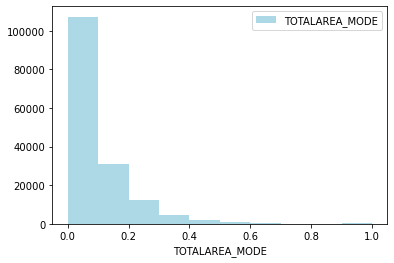

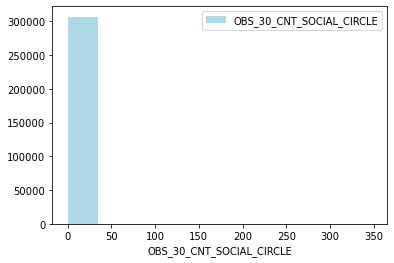

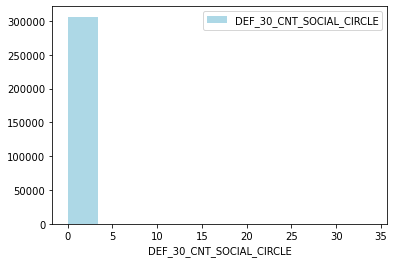

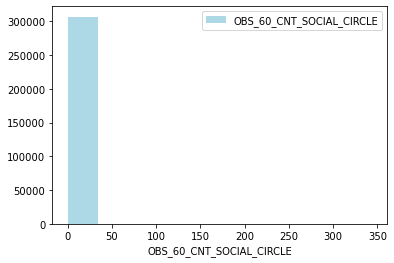

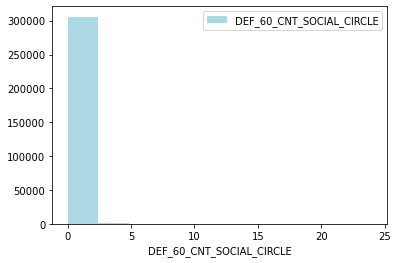

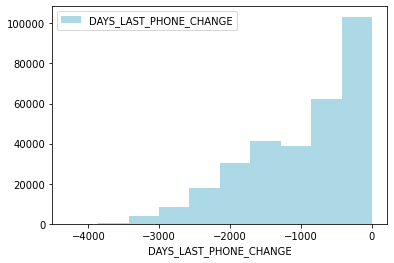

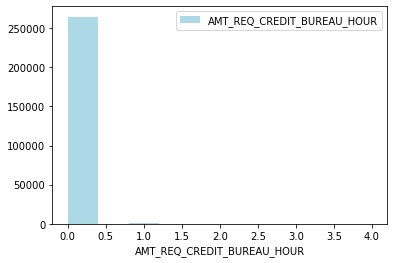

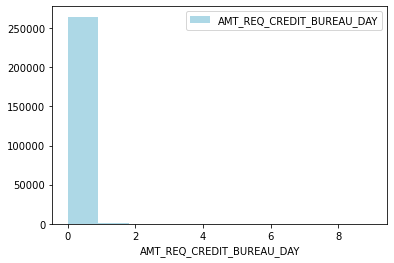

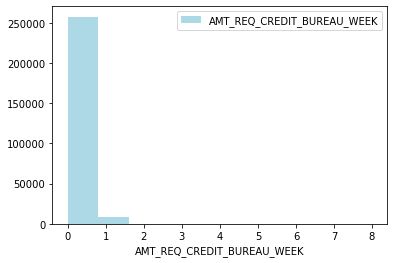

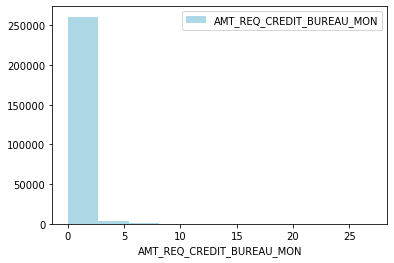

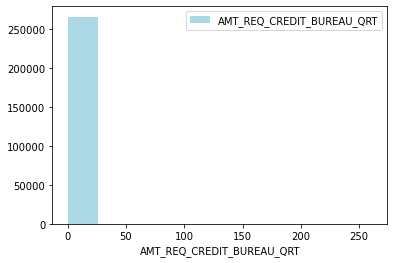

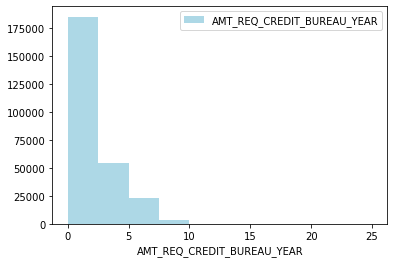

In [8]:
for col in numeric_columns:
    """
    Your CODE HERE, make the box plot
    """
    plt.hist(app_train[col], density=False, color = 'lightblue', cumulative = False, label = col)
    plt.legend()
    plt.xlabel(col)
    plt.show()

**請參考範例的欄位說明，觀察並列出三個你覺得可能有 outlier的欄位並解釋可能的原因。**<br>
Ans. 從上面的圖檢查的結果，至少 AMT_INCOME_TOTAL, REGION_POPULATION_RELATIVE, OWN_CAR_AGE 為outliner

### AMT_INCOME_TOTAL：最大值離平均與中位數很遠

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64


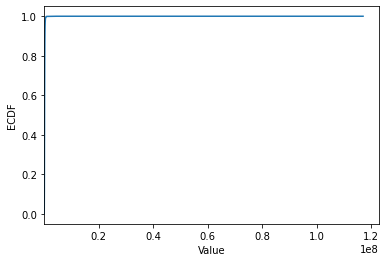

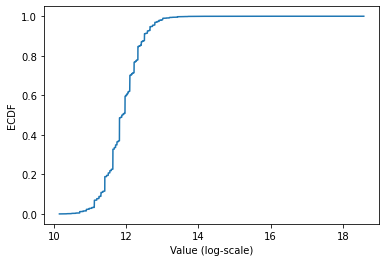

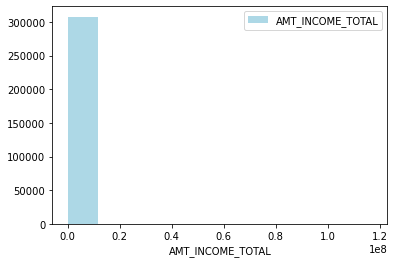

135000.0    35750
112500.0    31019
157500.0    26556
180000.0    24719
90000.0     22483
            ...  
101119.5        1
79425.0         1
101128.5        1
202275.0        1
262174.5        1
Name: AMT_INCOME_TOTAL, Length: 2548, dtype: int64

In [9]:
# 最大值離平均與中位數很遠
print(app_train['AMT_INCOME_TOTAL'].describe())

# 繪製 Empirical Cumulative Density Plot (ECDF)
cdf = app_train.AMT_INCOME_TOTAL.value_counts().sort_index().cumsum()
plt.plot(list(cdf.index), cdf/cdf.max())
plt.xlabel('Value')
plt.ylabel('ECDF')
plt.xlim([cdf.index.min(), cdf.index.max() * 1.05]) # 限制顯示圖片的範圍
plt.ylim([-0.05,1.05]) # 限制顯示圖片的範圍

plt.show()

# 繪製 Empirical Cumulative Density Plot (ECDF)
plt.plot(np.log(list(cdf.index)), cdf/cdf.max())
plt.xlabel('Value (log-scale)')
plt.ylabel('ECDF')

plt.ylim([-0.05,1.05]) # 限制顯示圖片的範圍

plt.show()

# 繪製直方圖
plt.hist(app_train.AMT_INCOME_TOTAL, density=False, color = 'lightblue', cumulative = False, label = 'AMT_INCOME_TOTAL')
plt.legend()
plt.xlabel('AMT_INCOME_TOTAL')
plt.show()

app_train['AMT_INCOME_TOTAL'].value_counts()

### REGION_POPULATION_RELATIVE：# 最大值落在分布之外

count    307511.000000
mean          0.020868
std           0.013831
min           0.000290
25%           0.010006
50%           0.018850
75%           0.028663
max           0.072508
Name: REGION_POPULATION_RELATIVE, dtype: float64


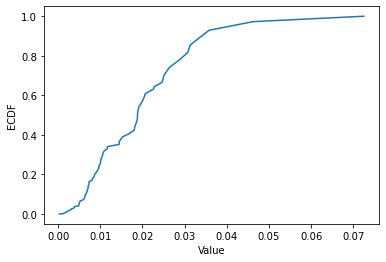

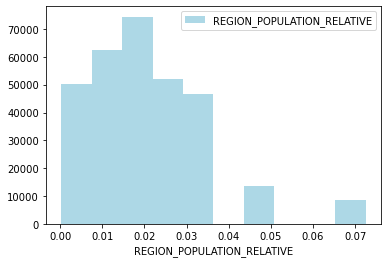

0.035792    16408
0.046220    13442
0.030755    12163
0.025164    11950
0.026392    11601
            ...  
0.001417      467
0.001333      235
0.000533       39
0.000938       28
0.000290        2
Name: REGION_POPULATION_RELATIVE, Length: 81, dtype: int64

In [10]:
# 最大值落在分布之外
print(app_train['REGION_POPULATION_RELATIVE'].describe())

# 繪製 Empirical Cumulative Density Plot (ECDF)
cdf = app_train.REGION_POPULATION_RELATIVE.value_counts().sort_index().cumsum()
plt.plot(list(cdf.index), cdf/cdf.max())
plt.xlabel('Value')
plt.ylabel('ECDF')
plt.ylim([-0.05,1.05]) # 限制顯示圖片的範圍
plt.show()

# 繪製直方圖
plt.hist(app_train.REGION_POPULATION_RELATIVE, density=False, color = 'lightblue', cumulative = False, label = 'REGION_POPULATION_RELATIVE')
plt.legend()
plt.xlabel('REGION_POPULATION_RELATIVE')
plt.show()

app_train['REGION_POPULATION_RELATIVE'].value_counts()

### OWN_CAR_AGE：# 最大值落在分布之外

count    104582.000000
mean         12.061091
std          11.944812
min           0.000000
25%           5.000000
50%           9.000000
75%          15.000000
max          91.000000
Name: OWN_CAR_AGE, dtype: float64


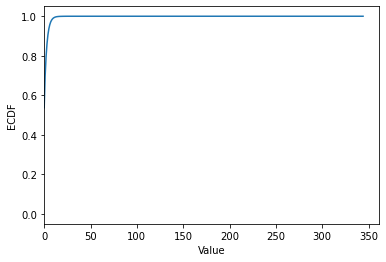

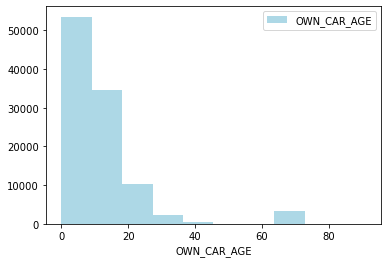

91.0       2
69.0       1
65.0     891
64.0    2443
63.0       2
        ... 
4.0     5557
3.0     6370
2.0     5852
1.0     5280
0.0     2134
Name: OWN_CAR_AGE, Length: 62, dtype: int64

In [11]:
print(app_train['OWN_CAR_AGE'].describe())

# 繪製 Empirical Cumulative Density Plot (ECDF)
cdf = app_train.OBS_60_CNT_SOCIAL_CIRCLE.value_counts().sort_index().cumsum()
plt.plot(list(cdf.index), cdf/cdf.max())
plt.xlabel('Value')
plt.ylabel('ECDF')
plt.xlim([cdf.index.min() * 0.95, cdf.index.max() * 1.05])
plt.ylim([-0.05,1.05]) # 限制顯示圖片的範圍
plt.show()

# 繪製直方圖
plt.hist(app_train.OWN_CAR_AGE, density=False, color = 'lightblue', cumulative = False, label = 'OWN_CAR_AGE')
plt.legend()
plt.xlabel('OWN_CAR_AGE')
plt.show()

app_train['OWN_CAR_AGE'].value_counts().sort_index(ascending = False)